In [9]:
from CryptoFinance import CryptoScraper as cs
# from CryptoFinance import CrytoDatabaseConnector

# from CrytoFinance.CryptoScraper import Scraper, CacheExplorer

import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
import hvplot.pandas

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.simplefilter('ignore')

ModuleNotFoundError: No module named 'CrytoDatabaseConnector'

In [5]:
# symbols = ["XRP", "ETH", "TRX", "USDT", "BTC", "BNB"]
symbols = ["ETH", "USDT", "BTC"]

# scraper = cs.Scraper()
# cf = 

while True:
    currency = input("Enter currency: ").upper()
    if currency not in symbols:
        print(f"Please enter any currency in {symbols}")
    else:
        break

period = input("Enter period (e.g. max, 2d, 1mo, 3mo, 10y): ")

def scrape_currency():
    stored_data = cs.Scraper(currency, period)
    stored_data.cache_currency()


def retrieve_data():
    cache_explorer = cs.CacheExplorer(currency=currency, period=period)
    return cache_explorer.get_currency_history()


btc_data = retrieve_data()

# data.index = pd.DataFrame(data.index)

btc_data

# yf.Ticker('BTC-GBP').history(period=period, interval='1h')

NameError: name 'cs' is not defined

In [229]:
data = btc_data.copy()

In [44]:
data.columns

Index(['_id', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [231]:
data['datetime'] = data['_id']
data.set_index(data['datetime'], inplace=True)
data.index = pd.to_datetime(data.index, infer_datetime_format=True)
data.drop(['Dividends', 'Stock Splits', '_id', 'datetime', 'Volume'], axis=1, inplace=True)
data

,Open,High,Low,Close
datetime,,,,
2021-08-03 00:00:00+00:00,28204.455078,28602.572266,27945.894531,28327.294922
2021-08-03 01:00:00+00:00,28326.119141,28326.119141,27973.533203,27973.533203
2021-08-03 02:00:00+00:00,27974.931641,28125.648438,27919.728516,28064.576172
2021-08-03 03:00:00+00:00,28064.537109,28067.361328,27771.798828,27840.082031
2021-08-03 04:00:00+00:00,27833.152344,27925.753906,27577.039062,27577.039062
...,...,...,...,...
2023-08-02 17:00:00+00:00,22799.857422,22952.712891,22756.898438,22888.484375
2023-08-02 18:00:00+00:00,22887.984375,22892.740234,22826.173828,22885.257812
2023-08-02 19:00:00+00:00,22902.675781,22951.183594,22887.125000,22920.636719


In [105]:
data.isna().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17304 entries, 2021-08-03 00:00:00+00:00 to 2023-08-02 21:00:00+00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    17304 non-null  float64
 1   High    17304 non-null  float64
 2   Low     17304 non-null  float64
 3   Close   17304 non-null  float64
dtypes: float64(4)
memory usage: 675.9 KB


In [233]:
data.describe()

,Open,High,Low,Close
count,17304.000000,17304.000000,17304.000000,17304.000000
mean,25291.085514,25374.614892,25204.949264,25290.371133
std,8724.728829,8766.203454,8680.953792,8724.491562
min,13225.777344,13288.554688,13195.842773,13228.312500
25%,18084.312012,18132.354004,18025.455566,18085.276855
50%,22992.998047,23065.619141,22919.211914,22993.499023
75%,31606.889648,31699.161133,31508.370117,31610.746582
max,50979.144531,51068.097656,50859.015625,50992.585938


In [48]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
tokinizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [50]:
def csvfiles_to_df(files_path: str):
    import pandas as pd
    import glob

    dfs = []

    csv_files =  glob.glob(files_path)
    for file in csv_files:
        df = pd.read_csv(file, index_col=0)
        # df['datetime'] = pd.to_datetime(df['datetime'])
        # df.set_index('datetime', inplace=True)
        dfs.append(df)

    return pd.concat(dfs)

In [51]:
tweets = csvfiles_to_df("./PoeNinja/bitcoin_tweets/*.csv")
# tweets = pd.read_csv(r"C:\Users\abume\OneDrive - University of Greenwich\Term2\Project\Internship\PoeNinja\tweet_bitcoin\@100trillionUSD_bitcoin_tweets.csv", index_col=0)
tweets.set_index('datetime', inplace=True)
tweets.index = pd.to_datetime(tweets.index)
tweets.sort_index()
tweets.drop_duplicates(inplace=True)
tweets

,user,handle,tweet,replies,retweets,likes,views
datetime,,,,,,,
2023-07-01 02:01:39+00:00,Pomp,@APompliano,Financial returns in first 6 months of the yea...,123,258,1479,187124
2023-06-28 22:00:18+00:00,Pomp,@APompliano,The 2023 Build or Die Bitcoin Mining conferenc...,70,49,227,134464
2023-06-28 13:03:51+00:00,Pomp,@APompliano,I am hosting a virtual conference on Bitcoin m...,46,28,160,69326
2023-06-21 23:54:40+00:00,Pomp,@APompliano,The Great Accumulation Race is underway.Instit...,132,318,1622,232175
2023-06-21 17:53:41+00:00,Pomp,@APompliano,Fed Chairman confirms he believes bitcoin and ...,91,239,1142,139952
...,...,...,...,...,...,...,...
2023-07-02 05:00:29+00:00,Zenith Bank,@ZenithBank,Good morning. Share with us in the comments…yo...,124,10,57,14171
2023-07-02 16:27:54+00:00,Sahara Reporters,@SaharaReporters,Gunmen Kill Pastor Adeboye’s Redeemed Church P...,165,285,453,98199
2023-07-02 16:27:07+00:00,Olamidé,@Olamide,Stop !,758,3187,16627,945981


In [52]:
tweets.drop_duplicates(inplace=True)

def classify_sentiment(value):
    if value > 3:
        return 1
    elif value < 3:
        return -1
    return 0

In [53]:
def score_sentiment(text, verbose=True, n=400):
    tokens = tokinizer.encode(text[:512], return_tensors="pt")
    result = model(tokens)
    return int(torch.argmax(result.logits) + 1)

In [54]:
from random import randint
num = randint(0, len(tweets))
tokens = tokinizer.encode(tweets['tweet'].iloc[num][:512], return_tensors="pt")
result = model(tokens)
score = int(torch.argmax(result.logits) + 1)
print(f"{tweets['tweet'].iloc[num]},\n\nscore: {score}")

Bitcoin bulls beware! BTC price must keep the 200-week moving average in play, says @MI_Algos.,

score: 1


In [56]:
tweets.shape

(3412, 7)

In [58]:
# # tweets['sentiment'] = tweets['sentiment_score'].apply(lambda x: 1 if x > 3 elif x < 3 else 0)

tweets['sentiment_score'] = tweets['tweet'].apply(lambda x: score_sentiment(x[:512]))
tweets['sentiment'] = tweets['sentiment_score'].apply(lambda x: classify_sentiment(x))

tweets

,user,handle,tweet,replies,retweets,likes,views,sentiment_score,sentiment
datetime,,,,,,,,,
2023-07-01 02:01:39+00:00,Pomp,@APompliano,Financial returns in first 6 months of the yea...,123,258,1479,187124,2,-1
2023-06-28 22:00:18+00:00,Pomp,@APompliano,The 2023 Build or Die Bitcoin Mining conferenc...,70,49,227,134464,5,1
2023-06-28 13:03:51+00:00,Pomp,@APompliano,I am hosting a virtual conference on Bitcoin m...,46,28,160,69326,4,1
2023-06-21 23:54:40+00:00,Pomp,@APompliano,The Great Accumulation Race is underway.Instit...,132,318,1622,232175,5,1
2023-06-21 17:53:41+00:00,Pomp,@APompliano,Fed Chairman confirms he believes bitcoin and ...,91,239,1142,139952,5,1
...,...,...,...,...,...,...,...,...,...
2023-07-02 05:00:29+00:00,Zenith Bank,@ZenithBank,Good morning. Share with us in the comments…yo...,124,10,57,14171,5,1
2023-07-02 16:27:54+00:00,Sahara Reporters,@SaharaReporters,Gunmen Kill Pastor Adeboye’s Redeemed Church P...,165,285,453,98199,1,-1
2023-07-02 16:27:07+00:00,Olamidé,@Olamide,Stop !,758,3187,16627,945981,1,-1


In [70]:
import random

In [83]:
# hue = tweets['sentiment_category'].uniqu

tweets['noise_sentiment'] = tweets['sentiment_score'].apply(lambda x: x + random.uniform(-0.7888, -0.1888))
tweets

,user,handle,tweet,replies,retweets,likes,views,sentiment_score,sentiment,noise_sentiment
datetime,,,,,,,,,,
2023-07-01 02:01:39+00:00,Pomp,@APompliano,Financial returns in first 6 months of the yea...,123,258,1479,187124,2,-1,1.461565
2023-06-28 22:00:18+00:00,Pomp,@APompliano,The 2023 Build or Die Bitcoin Mining conferenc...,70,49,227,134464,5,1,4.483274
2023-06-28 13:03:51+00:00,Pomp,@APompliano,I am hosting a virtual conference on Bitcoin m...,46,28,160,69326,4,1,3.253375
2023-06-21 23:54:40+00:00,Pomp,@APompliano,The Great Accumulation Race is underway.Instit...,132,318,1622,232175,5,1,4.750354
2023-06-21 17:53:41+00:00,Pomp,@APompliano,Fed Chairman confirms he believes bitcoin and ...,91,239,1142,139952,5,1,4.775125
...,...,...,...,...,...,...,...,...,...,...
2023-07-02 05:00:29+00:00,Zenith Bank,@ZenithBank,Good morning. Share with us in the comments…yo...,124,10,57,14171,5,1,4.787771
2023-07-02 16:27:54+00:00,Sahara Reporters,@SaharaReporters,Gunmen Kill Pastor Adeboye’s Redeemed Church P...,165,285,453,98199,1,-1,0.304483
2023-07-02 16:27:07+00:00,Olamidé,@Olamide,Stop !,758,3187,16627,945981,1,-1,0.793673


<Axes: xlabel='datetime'>

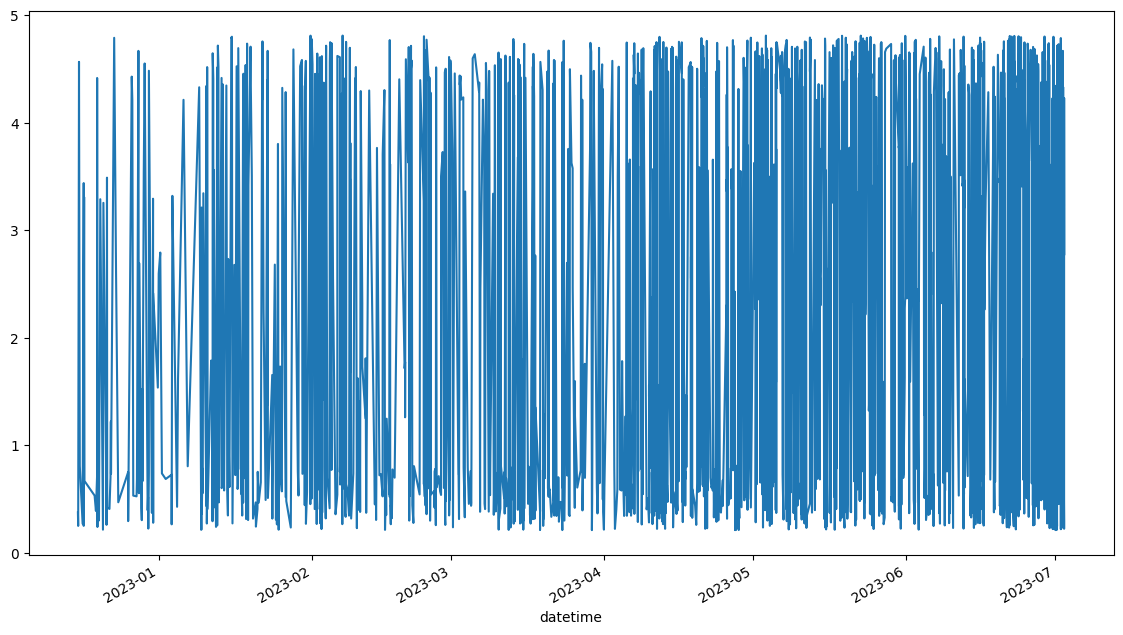

In [84]:
# import matplotlib.pyplot as plt
# color_mapping = {-1: 'red', 0: 'gray', 1: 'green'}
plt.figure(figsize=(14,8))
tweets['noise_sentiment'].plot()

In [130]:
sample = tweets['sentiment_score']
sampled = tweets['sentiment_score'].resample('60min').mean()
sampled.dropna(inplace=True)
sampled.shape

(1357,)

In [131]:
comb = pd.merge(data, sampled, on='datetime', how='outer')
comb.dropna(axis=0, inplace=True)
comb.sort_index(inplace=True)
comb

,Open,High,Low,Close,sentiment_score
datetime,,,,,
2022-12-15 16:00:00+00:00,14276.847656,14300.223633,14244.714844,14274.522461,1.0
2022-12-15 18:00:00+00:00,14326.591797,14326.843750,14261.043945,14261.043945,1.0
2022-12-15 22:00:00+00:00,14286.947266,14286.947266,14217.102539,14240.804688,5.0
2022-12-16 01:00:00+00:00,14283.488281,14291.265625,14257.816406,14260.982422,1.0
2022-12-16 15:00:00+00:00,13949.784180,13983.774414,13937.185547,13978.731445,1.0
...,...,...,...,...,...
2023-07-02 16:00:00+00:00,24002.931641,24120.904297,23997.433594,24063.783203,1.8
2023-07-02 18:00:00+00:00,23970.011719,24012.582031,23922.541016,24012.582031,4.0
2023-07-02 19:00:00+00:00,24021.953125,24098.779297,24018.621094,24094.373047,1.0


In [154]:
comb.corr()

,Open,High,Low,Close,sentiment_score
Open,1.000000,0.999479,0.999492,0.999128,0.091903
High,0.999479,1.000000,0.999160,0.999598,0.090469
Low,0.999492,0.999160,1.000000,0.999554,0.092743
Close,0.999128,0.999598,0.999554,1.000000,0.091743
sentiment_score,0.091903,0.090469,0.092743,0.091743,1.000000


array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

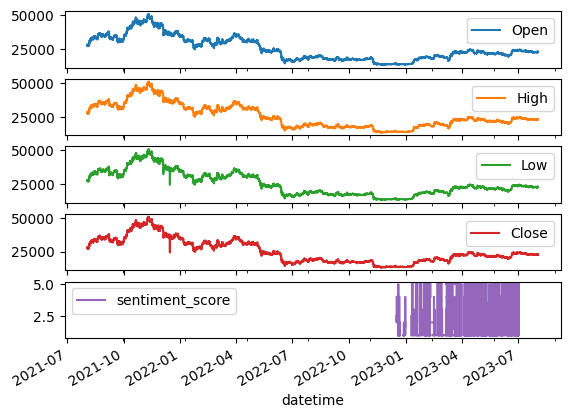

In [124]:
comb.plot(subplots=True)

In [135]:
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(comb)


Correlation

In [158]:
pd.DataFrame(data_scaled).corr()

,0,1,2,3,4
0,1.000000,0.999479,0.999492,0.999128,0.091903
1,0.999479,1.000000,0.999160,0.999598,0.090469
2,0.999492,0.999160,1.000000,0.999554,0.092743
3,0.999128,0.999598,0.999554,1.000000,0.091743
4,0.091903,0.090469,0.092743,0.091743,1.000000


<Axes: >

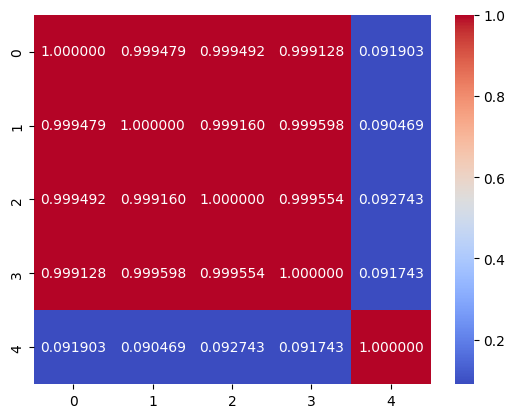

In [164]:
sns.heatmap(pd.DataFrame(data_scaled).corr(), cmap='coolwarm', annot=True, fmt='4f')

In [317]:
data.describe()

,Open,High,Low,Close
count,17304.000000,17304.000000,17304.000000,17304.000000
mean,25291.085514,25374.614892,25204.949264,25290.371133
std,8724.728829,8766.203454,8680.953792,8724.491562
min,13225.777344,13288.554688,13195.842773,13228.312500
25%,18084.312012,18132.354004,18025.455566,18085.276855
50%,22992.998047,23065.619141,22919.211914,22993.499023
75%,31606.889648,31699.161133,31508.370117,31610.746582
max,50979.144531,51068.097656,50859.015625,50992.585938


Moving Averages

In [283]:
# def visualize_moving_averages(data):
#     viz_data = data.copy()
#     viz_data['24hr_MA'] = viz_data['Close'].rolling(120).mean()
#     viz_data['240hr_MA'] = viz_data['Close'].rolling(1200).mean()

#     plot = viz_data.hvplot(
#         y=['Close', '24hr_MA', '240hr_MA'],
#         x='datetime',
#         width=1400, height=800,
#         title='Bitcoin Moving Averages',
#     )

#     hvplot.show(plot)
 
def visualize_moving_averages(data):
    viz_data = data.copy()
    viz_data['5d_MA'] = viz_data['Close'].rolling(120).mean()
    # viz_data['10d_MA'] = viz_data['Close'].rolling(240).mean()
    viz_data['50d_MA'] = viz_data['Close'].rolling(1200).mean()

    # Use hvplot to create the interactive plot with glowing features, dark background, and grid
    plot = viz_data.hvplot(
        y=['Close', '5d_MA', '50d_MA'],
        x='datetime',
        width=1400, height=800,
        title='Bitcoin Moving Averages',
        line_width=4,  # Increase line width for glowing effect
        line_alpha=0.8,  # Set line alpha for glowing effect
        line_color=['#ff0000', '#00ff00', '#0000ff'],  # Customize line colors
        grid=True,  # Display grid
        fontsize={'title': 20, 'labels': 15},  # Adjust fontsize
        xlim=(viz_data.index.min(), viz_data.index.max()),  # Set xlim
        ylim=(viz_data['Close'].min(), viz_data['Close'].max()),  # Set ylim
    ).opts(show_grid=True)

    # Show the interactive plot
    hvplot.show(plot)


In [284]:

visualize_moving_averages(data=data)
# viz_data

Launching server at http://localhost:58522


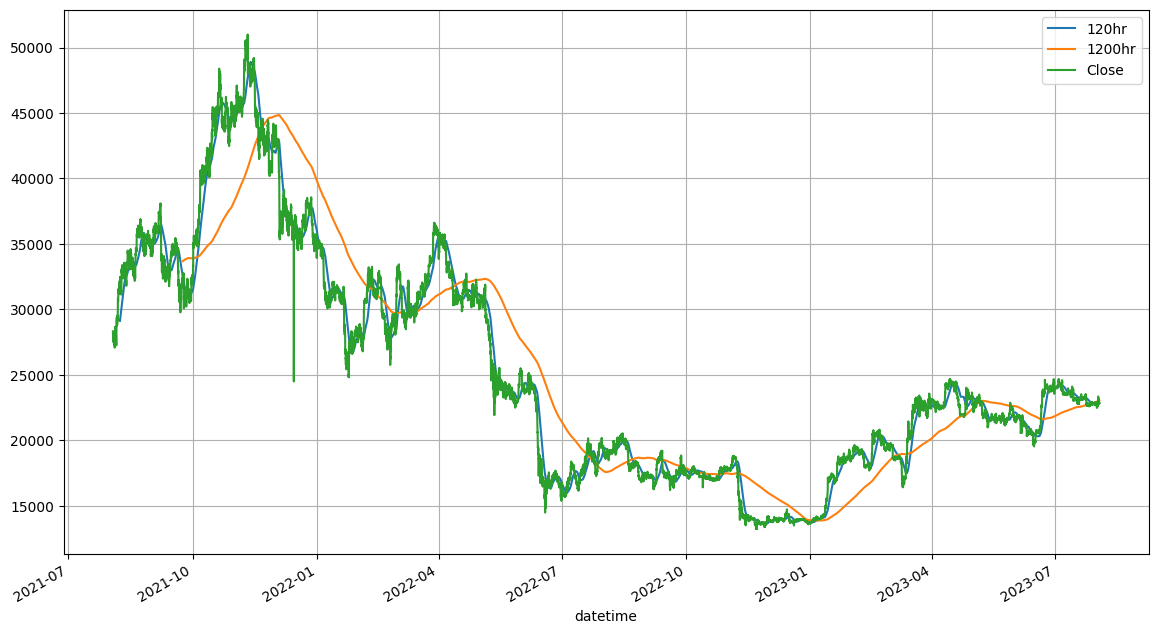

In [186]:
plt.figure(figsize=(14,8))
viz_data['Close'].rolling(120).mean().plot(label='120hr')
viz_data['Close'].rolling(1200).mean().plot(label='1200hr')
viz_data['Close'].plot(label='Close')
plt.grid(True)
plt.legend()

In [295]:
data["Close"].diff().hvplot(width=1000, height=600)

:Curve   [datetime]   (Close)

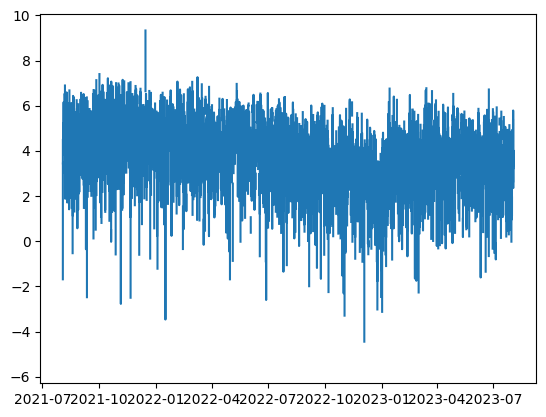

In [313]:
plt.plot(np.log(data["Close"].diff()[1:]))

In [136]:
from keras.preprocessing.sequence import TimeseriesGenerator

# TimeseriesGenerator(data, target, length, batch_size)

# X = data.drop(['Close'], axis=1)
# y = data['Close']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape
data_scaled

array([[0.06168683, 0.05692149, 0.06760196, 0.06936665, 0.        ],
       [0.06617552, 0.05932881, 0.06907612, 0.06815713, 0.        ],
       [0.06259818, 0.05572088, 0.06510918, 0.06634093, 1.        ],
       ...,
       [0.9410405 , 0.94302764, 0.94997132, 0.95056769, 0.        ],
       [0.94730921, 0.94527979, 0.95392874, 0.95068986, 0.        ],
       [0.94870539, 0.94377141, 0.95398411, 0.94775869, 0.75      ]])

In [137]:
features = data_scaled
target = data_scaled[:, 3]


In [138]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False, random_state=42)

In [144]:
window_length = 24*5
num_features = 5
batch_size = 64

train_gen = TimeseriesGenerator(X_train, y_train, length=window_length, batch_size=batch_size)
test_gen = TimeseriesGenerator(X_test, y_test, length=window_length, batch_size=batch_size)

In [145]:
train_gen[0]

(array([[[0.06168683, 0.05692149, 0.06760196, 0.06936665, 0.        ],
         [0.06617552, 0.05932881, 0.06907612, 0.06815713, 0.        ],
         [0.06259818, 0.05572088, 0.06510918, 0.06634093, 1.        ],
         ...,
         [0.34247337, 0.33861615, 0.34725009, 0.34541367, 0.        ],
         [0.3399066 , 0.33660456, 0.3460033 , 0.34542331, 0.125     ],
         [0.33400252, 0.33023243, 0.34084951, 0.33936258, 0.5       ]],
 
        [[0.06617552, 0.05932881, 0.06907612, 0.06815713, 0.        ],
         [0.06259818, 0.05572088, 0.06510918, 0.06634093, 1.        ],
         [0.06228605, 0.0561114 , 0.06878475, 0.06815161, 0.        ],
         ...,
         [0.3399066 , 0.33660456, 0.3460033 , 0.34542331, 0.125     ],
         [0.33400252, 0.33023243, 0.34084951, 0.33936258, 0.5       ],
         [0.33898591, 0.336172  , 0.34746432, 0.34598294, 1.        ]],
 
        [[0.06259818, 0.05572088, 0.06510918, 0.06634093, 1.        ],
         [0.06228605, 0.0561114 , 0.0687847

In [141]:
from tensorflow import keras
from keras.layers import Dense, Input, LSTM, MultiHeadAttention, Dropout
from keras.callbacks import EarlyStopping

from keras.models import Sequential
from keras.activations import relu, sigmoid, tanh
from keras.optimizers import SGD, Adam
from keras.losses import MSE  # error estimation

In [146]:
model = Sequential()

model.add(LSTM(128, input_shape=(window_length, num_features), return_sequences=True, activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True, activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False, activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 120, 128)          68608     
                                                                 
 dropout_4 (Dropout)         (None, 120, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 120, 128)          131584    
                                                                 
 dropout_5 (Dropout)         (None, 120, 128)          0         
                                                                 
 lstm_6 (LSTM)               (None, 120, 64)           49408     
                                                                 
 dropout_6 (Dropout)         (None, 120, 64)           0         
                                                                 
 lstm_7 (LSTM)               (None, 32)               

In [147]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min')

model.compile(optimizer='adam', loss='MSE', metrics='MAE')

history = model.fit(train_gen, epochs=50, validation_data=test_gen, shuffle=False, callbacks=[early_stopping], batch_size=5000)

Epoch 1/50
15/15 [==============================] - 31s 1s/step - loss: 0.3000 - MAE: 0.4317 - val_loss: 0.3990 - val_MAE: 0.6314
Epoch 2/50
15/15 [==============================] - 25s 2s/step - loss: 0.2416 - MAE: 0.4684 - val_loss: 0.2334 - val_MAE: 0.4827
Epoch 3/50
15/15 [==============================] - 27s 2s/step - loss: 0.0434 - MAE: 0.1696 - val_loss: 0.0798 - val_MAE: 0.2815
Epoch 4/50
15/15 [==============================] - 37s 3s/step - loss: 0.0356 - MAE: 0.1505 - val_loss: 0.0024 - val_MAE: 0.0420
Epoch 5/50
15/15 [==============================] - 44s 3s/step - loss: 0.0250 - MAE: 0.1259 - val_loss: 0.0106 - val_MAE: 0.0995
Epoch 6/50
15/15 [==============================] - 44s 3s/step - loss: 0.0229 - MAE: 0.1206 - val_loss: 0.0015 - val_MAE: 0.0310
Epoch 7/50
15/15 [==============================] - 49s 3s/step - loss: 0.0223 - MAE: 0.1191 - val_loss: 0.0017 - val_MAE: 0.0337
Epoch 8/50
15/15 [==============================] - 46s 3s/step - loss: 0.0195 - MAE: 0.11

In [149]:
# history.history['loss'][1] = 0.1011
# history.history['MAE'][1] = 0.7102

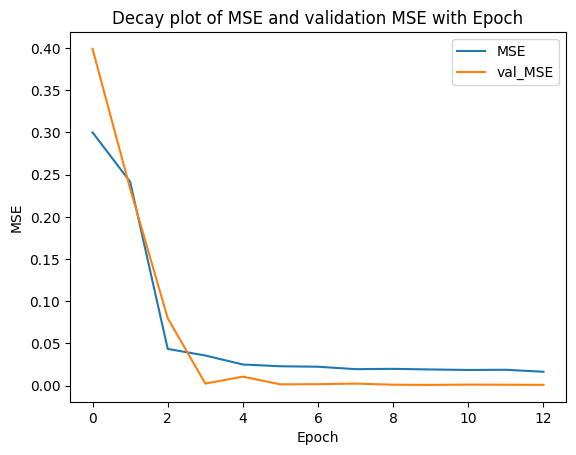

In [148]:
# Plot validation MSE
plt.plot(history.history["loss"], label="MSE")
plt.plot(history.history["val_loss"], label="val_MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.title('Decay plot of MSE and validation MSE with Epoch')
plt.show()

In [150]:
model.evaluate(test_gen)

3/3 [==============================] - 1s 286ms/step - loss: 8.6605e-04 - MAE: 0.0206


[0.0008660467574372888, 0.020560188218951225]

In [151]:
predictions = model.predict(test_gen)

3/3 [==============================] - 2s 255ms/step


In [152]:
def rebuild_data_and_score(predictions, X_test, win_length):
    X_test[:,1:][win_length:]
    df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(X_test[:,1:][win_length:])], axis=1)
    df_inv = scaler.inverse_transform(df_pred)
    df_final = data[predictions.shape[0]*-1:]
    
    df_final['Close_Trend'] = 0
    for i in range(len(df_final.index)-1):
        df_final['Close_Trend'][i] = df_final['Close'][i+1] > df_final['Close'][i]

    df_final['Close_pred_Trend'] = [None] * len(df_final.index)
    for i in range(len(df_final.index)-1):
        df_final['Close_pred_Trend'][i] = df_final['Close_Trend'][i+1] > df_final['Close_Trend'][i]

    matching_percentage = np.mean(df_final['Close_Trend'] == df_final['Close_pred_Trend']) * 100
    print(f"Matching Percentage: {matching_percentage:.2f}%")

In [318]:
rebuild_data_and_score(predictions, X_test, window_length)

Matching Percentage: 28.28%


Without sentiment: Matching Percentage: 23.63%

With sentiment: Matching Percentage: 28.28%